In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xxran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read in original csv from my GitHub
initDataDf = pd.read_csv("https://raw.githubusercontent.com/JordanVencel/DFProject/main/Tesla.csv")
# Filter out tweets that are not in english 
filterDf = initDataDf[['language','tweet']]
filterDf = filterDf.where(filterDf['language'] == 'en')
filterDf = filterDf[filterDf['language'].notna()]
# Grab only tweet text data
tweetDf = filterDf['tweet'].to_frame()
tweetDf = tweetDf.reset_index(drop=True)
# Filter out @s, hashtags, external links, and other irrelavant information using regex
for row in tweetDf.iterrows():
    index = row[0]
    booty = re.sub(r"([@#])\w+", "", row[1][0])
    booty = re.sub(r"(https)([^\s]+)", "", booty)
    booty = re.sub(r"(\?)", "", booty)
    booty = re.sub(r"(.com)", "", booty)
    booty = re.sub(r"([^A-Za-z'\"\s])", "", booty)
    booty = re.sub(r"(^[ \t]+)", "", booty)
    booty = booty.lower()
    tweetDf.iloc[index][0] = booty

tweetDf

tweet
0     i have six  of them still live at home being h...
1     then go for your dozen kids you are just missi...
2     about buying a country    you could turn it in...
3     actual receipts and yet you havent asked anyon...
4     tesla wall battery for the save power went out...
...                                                 ...
7353  elon musk liked a tweet from whole mars catalo...
7354  dude only said he is buying twitter to sell  b...
7355                                 give me your tesla
7356  chick fil a should definitely go public they s...
7357                 fossil fuels like coal natural gas

[7358 rows x 1 columns]

In [3]:
# Set up row id formatting for nltk
import sys
tweetDf['row_id'] = 0
tweetDf = tweetDf[['row_id', 'tweet']]
for row in tweetDf.iterrows():
    index = row[0]
    newVal = int(index) + 1
    tweetDf['row_id'][index] = newVal

C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\3884536453.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetDf['row_id'][index] = newVal


In [4]:
sentimentDf = pd.DataFrame()
sentimentDf['row_id'] = ['99999999999']
sentimentDf['sentiment_type'] = 'NA999NA'
sentimentDf['sentiment_score'] = 0

print('Processing sentiment analysis...')
sia = SentimentIntensityAnalyzer()
tempDf = sentimentDf
for index, row in tweetDf.iterrows():
    scores = sia.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        sentimentDf['row_id'] = row[0]
        sentimentDf['sentiment_type'] = key
        sentimentDf['sentiment_score'] = value
        tempDf = tempDf.append(sentimentDf)
#remove dummy row with row_id = 99999999999
tempDf_cleaned = tempDf[tempDf.row_id != '99999999999']
#remove duplicates if any exist
tempDf_cleaned = tempDf_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
tempDf_cleaned = tempDf[tempDf.sentiment_type == 'compound']

print(tempDf_cleaned)

Processing sentiment analysis...


C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_2073

    row_id sentiment_type  sentiment_score
0        1       compound          -0.4767
0        2       compound          -0.2960
0        3       compound           0.5267
0        4       compound           0.4404
0        5       compound           0.2732
..     ...            ...              ...
0     7354       compound           0.4215
0     7355       compound          -0.0516
0     7356       compound           0.0000
0     7357       compound           0.6908
0     7358       compound           0.6124

[7358 rows x 3 columns]


C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_20736\199664697.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempDf = tempDf.append(sentimentDf)
C:\Users\xxran\AppData\Local\Temp\ipykernel_2073

In [5]:
tempDf_cleaned = tempDf_cleaned.reset_index(drop=True)
tempDf_cleaned

row_id sentiment_type  sentiment_score
0          1       compound          -0.4767
1          2       compound          -0.2960
2          3       compound           0.5267
3          4       compound           0.4404
4          5       compound           0.2732
...      ...            ...              ...
7353    7354       compound           0.4215
7354    7355       compound          -0.0516
7355    7356       compound           0.0000
7356    7357       compound           0.6908
7357    7358       compound           0.6124

[7358 rows x 3 columns]

In [6]:
recombined_df = pd.DataFrame(columns=['row_id', 'tweet', 'sentiment_type', 'sentiment_score'])
recombined_df['tweet'] = tweetDf['tweet']
recombined_df[['row_id', 'sentiment_type', 'sentiment_score']] = tempDf_cleaned[['row_id', 'sentiment_type', 'sentiment_score']]
recombined_df

row_id                                              tweet  \
0          1  i have six  of them still live at home being h...   
1          2  then go for your dozen kids you are just missi...   
2          3  about buying a country    you could turn it in...   
3          4  actual receipts and yet you havent asked anyon...   
4          5  tesla wall battery for the save power went out...   
...      ...                                                ...   
7353    7354  elon musk liked a tweet from whole mars catalo...   
7354    7355  dude only said he is buying twitter to sell  b...   
7355    7356                                 give me your tesla   
7356    7357  chick fil a should definitely go public they s...   
7357    7358                 fossil fuels like coal natural gas   

     sentiment_type  sentiment_score  
0          compound          -0.4767  
1          compound          -0.2960  
2          compound           0.5267  
3          compound           0.4404  
4          compound           0.2732  
...             ...              ...  
7353       compound           0.4215  
7354       compound          -0.0516  
7355       compound           0.0000  
7356       compound           0.6908  
7357       compound           0.6124  

[7358 rows x 4 columns]

In [7]:
from gensim.models import Word2Vec, FastText
import pandas as pd 
import re 

from sklearn.decomposition import PCA

from matplotlib import  pyplot as plt 
import plotly.graph_objects as go 

import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(recombined_df['tweet'])
#tfidf_matrix = tfidf.fit_transform(recombined_df.tweet).todense()
#vocab = tfidf.vocabulary
#print(vocab)

In [9]:
tokenized_tweet = recombined_df['tweet'].apply(lambda x: x.split())
w2v = Word2Vec(tokenized_tweet, min_count=5, vector_size=200, window=5, sg = 1, hs=0, workers=32, seed=34, negative=10)
w2v.train(tokenized_tweet, total_examples=len(recombined_df['tweet']), epochs=20)
#print(w2v)

#Word2Vec(vector_size=2, alpha=0.025)

(2059714, 3116360)

In [10]:
w2v.wv.most_similar(positive='elon')

[('musk', 0.6451878547668457),
 ('mock', 0.5223562121391296),
 ('officially', 0.5199567079544067),
 ('defends', 0.49776196479797363),
 ("artist'", 0.49224454164505005),
 ('shirt', 0.49045348167419434),
 ('bullst', 0.4890637695789337),
 ('amid', 0.48489540815353394),
 ('rips', 0.4845215380191803),
 ('withdrawing', 0.4818291664123535)]

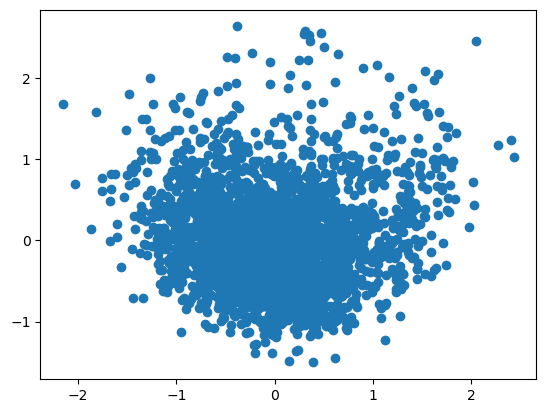

In [11]:
X = w2v.wv[w2v.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])

words = list(w2v.wv.key_to_index)

#for i, word in enumerate(words):
 # plt.annotate(word, xy=(result[i, 0], result[i,1]))

plt.show()
#fig.show()

In [12]:
#for w in w2v.wv.key_to_index:
#    print (w, w2v.wv[w].count)
import re

words = w2v.wv.index_to_key
clean_words = []
usless_words = []
for word in words:
    if (len(word) >= 5):
        clean_words.append(word)
    else:
        usless_words.append(word)

 
word_dict = {}
total_words = 0
total_usefull = 0
total_useless = 0
useless_dict = {}
total_dict = {}
for tweets in tokenized_tweet:
    for x in tweets:
        total_words += 1

        if (x in clean_words):
            total_usefull += 1
        if (x in usless_words):
            total_useless +=1

        if ((x in useless_dict) and (x in usless_words)):
            useless_dict[x] += 1
        elif ((x not in useless_dict) and (x in usless_words)):
            useless_dict[x] = 1

        if (x in word_dict and x in clean_words):
            word_dict[x] += 1
        elif (x not in word_dict and x in clean_words):
            word_dict[x] = 1

In [13]:
#{k: v for k, v in sorted(word_dict.items(), reverse=True, key=lambda item: item[1])}
{k: v for k, v in sorted(useless_dict.items(), reverse=True, key=lambda item: item[1])}



{'the': 5582,
 'to': 4206,
 'a': 3673,
 'and': 2966,
 'of': 2462,
 'is': 2449,
 'in': 2264,
 'you': 1846,
 'i': 1763,
 'for': 1762,
 'it': 1517,
 'that': 1445,
 'on': 1202,
 'he': 1082,
 'with': 1047,
 'are': 987,
 'this': 925,
 'have': 915,
 'not': 902,
 'be': 896,
 'elon': 827,
 'but': 770,
 'as': 725,
 'will': 704,
 'at': 700,
 'was': 692,
 'musk': 664,
 'they': 648,
 'his': 635,
 'my': 634,
 'your': 617,
 'if': 616,
 'just': 608,
 'all': 605,
 'from': 568,
 'so': 564,
 'like': 540,
 'can': 506,
 'has': 487,
 'more': 485,
 'or': 484,
 'out': 469,
 'car': 462,
 'its': 448,
 'by': 444,
 'what': 443,
 'an': 428,
 'up': 426,
 'no': 421,
 'buy': 420,
 'when': 407,
 'we': 404,
 'how': 401,
 'do': 395,
 'now': 389,
 'one': 375,
 'get': 358,
 'me': 306,
 'deal': 303,
 'than': 302,
 'cars': 296,
 'amp': 292,
 'why': 283,
 'only': 282,
 'tsla': 275,
 'who': 270,
 'him': 263,
 'new': 258,
 'know': 252,
 'time': 249,
 "it's": 247,
 'then': 240,
 'down': 240,
 'them': 235,
 'good': 233,
 'also':

<AxesSubplot:>

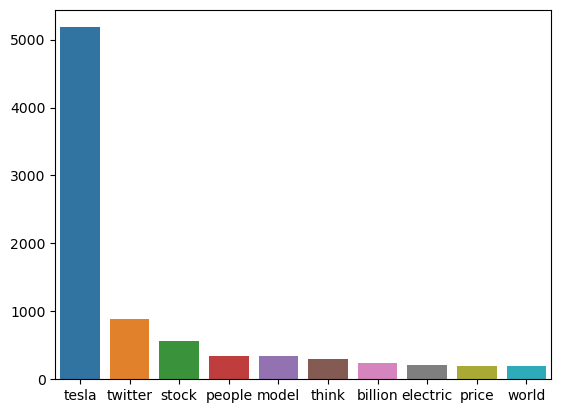

In [14]:
import seaborn as sns
data = {'words': ['tesla', 'twitter', 'stock', 'people', 'model', 'think', 'billion', 'electric', 'price', 'world'],
        'freq': [5181,891,557,337,336,302,244,211,194,191]}
usefull_df = pd.DataFrame(data=data)

sns.barplot(data=data, x="words", y="freq")

<AxesSubplot:>

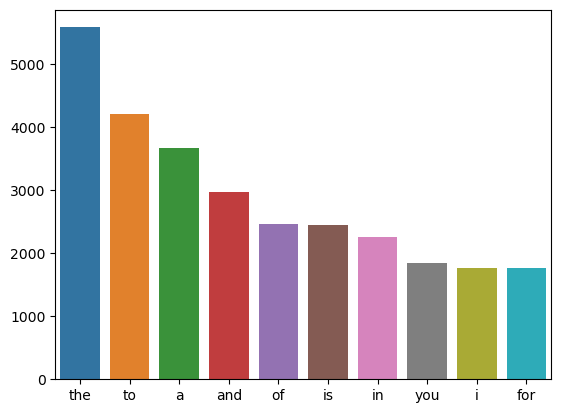

In [15]:
'''
'the': 5582,
 'to': 4206,
 'a': 3673,
 'and': 2966,
 'of': 2462,
 'is': 2449,
 'in': 2264,
 'you': 1846,
 'i': 1763,
 'for': 1762,
'''
data = {'words': ['the', 'to', 'a', 'and', 'of', 'is', 'in', 'you', 'i', 'for'],
        'freq': [5582, 4206, 3673, 2966, 2462, 2449, 2264, 1846, 1763, 1762]}
useless_df = pd.DataFrame(data=data)

sns.barplot(data=data, x="words", y="freq")